In [4]:
import scanpy as sc
import numpy as np
import warnings 
warnings.filterwarnings ("ignore")
import re, random
from pathlib import Path
import json
import pandas as pd
from pandas import DataFrame
import os, sys
import torch
import TOSICA
from icecream import ic
ic.configureOutput(includeContext=True, argToStringFunction=lambda _: str(_))
from utils.log_util import logger

In [5]:
new_adata = sc.read('demo_attn.h5ad')
new_adata

AnnData object with n_obs × n_vars = 4218 × 299
    obs: 'Prediction', 'Probability', 'Celltype'

In [6]:
print(sorted(new_adata.obs['Prediction'].unique()))
print(len(new_adata.obs['Prediction'].unique()))
celltype = ("alpha","beta","ductal","acinar","delta","PP","PSC","endothelial","epsilon","mast","macrophage","schwann",'t_cell')
print(sorted(celltype))
print(len(celltype))
print(sorted(new_adata.obs['Celltype'].unique()))
print(len(new_adata.obs['Celltype'].unique()))

['PP', 'PSC', 'acinar', 'alpha', 'beta', 'delta', 'ductal', 'endothelial', 'epsilon', 'macrophage', 'mast', 'schwann']
12
['PP', 'PSC', 'acinar', 'alpha', 'beta', 'delta', 'ductal', 'endothelial', 'epsilon', 'macrophage', 'mast', 'schwann', 't_cell']
13
['MHC class II', 'PP', 'PSC', 'acinar', 'alpha', 'beta', 'delta', 'ductal', 'endothelial', 'epsilon', 'mast']
11


In [7]:
new_adata.raw = new_adata
sc.pp.normalize_total(new_adata, target_sum=1e4)
sc.pp.log1p(new_adata)
sc.pp.scale(new_adata, max_value=10)
sc.tl.pca(new_adata, svd_solver='arpack')
sc.pp.neighbors(new_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(new_adata)

23-05-20 07:28 byteflow.py 74: bytecode dump:
>          0	NOP(arg=None, lineno=53)
           2	LOAD_FAST(arg=0, lineno=53)
           4	LOAD_CONST(arg=1, lineno=53)
           6	BINARY_SUBSCR(arg=None, lineno=53)
           8	LOAD_CONST(arg=2, lineno=53)
          10	BINARY_AND(arg=None, lineno=53)
          12	LOAD_CONST(arg=3, lineno=53)
          14	BINARY_LSHIFT(arg=None, lineno=53)
          16	LOAD_CONST(arg=4, lineno=53)
          18	BINARY_AND(arg=None, lineno=53)
          20	LOAD_FAST(arg=0, lineno=54)
          22	LOAD_CONST(arg=1, lineno=54)
          24	BINARY_SUBSCR(arg=None, lineno=54)
          26	LOAD_CONST(arg=5, lineno=54)
          28	BINARY_LSHIFT(arg=None, lineno=54)
          30	LOAD_CONST(arg=4, lineno=54)
          32	BINARY_AND(arg=None, lineno=54)
          34	LOAD_FAST(arg=0, lineno=54)
          36	LOAD_CONST(arg=1, lineno=54)
          38	BINARY_SUBSCR(arg=None, lineno=54)
          40	BINARY_XOR(arg=None, lineno=54)
          42	LOAD_CONST(arg=6, lineno

In [8]:
col = np.array([
"#98DF8A","#E41A1C" ,"#377EB8", "#4DAF4A" ,"#984EA3" ,"#FF7F00" ,"#FFFF33" ,"#A65628" ,"#F781BF" ,"#999999","#1F77B4","#FF7F0E","#279E68","#FF9896"
]).astype('<U7')

celltype = ("alpha","beta","ductal","acinar","delta","PP","PSC","endothelial","epsilon","mast","macrophage","schwann",'t_cell')
new_adata.obs['Prediction'] = new_adata.obs['Prediction'].astype('category')
new_adata.obs['Prediction'] = new_adata.obs['Prediction'].cat.reorder_categories(list(celltype[:-1]))
new_adata.uns['Prediction_colors'] = col[1:]

celltype = ("MHC class II","alpha","beta","ductal","acinar","delta","PP","PSC","endothelial","epsilon","mast")
new_adata.obs['Celltype'] = new_adata.obs['Celltype'].astype('category')
new_adata.obs['Celltype'] = new_adata.obs['Celltype'].cat.reorder_categories(list(celltype))
new_adata.uns['Celltype_colors'] = col[:11]

23-05-20 07:31 pyplot.py 339: Loaded backend module://matplotlib_inline.backend_inline version unknown.
23-05-20 07:31 pyplot.py 339: Loaded backend module://matplotlib_inline.backend_inline version unknown.
23-05-20 07:31 font_manager.py 1378: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
23-05-20 07:31 font_manager.py 1390: findfont: score(FontEntry(fname='/home/qcdong/anaconda3/envs/tosica/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
23-05-20 07:31 font_manager.py 1390: findfont: score(FontEntry(fname='/home/qcdong/anaconda3/envs/tosica/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
23-05-20 07:31 font_manager.py 1390: findfont: sc

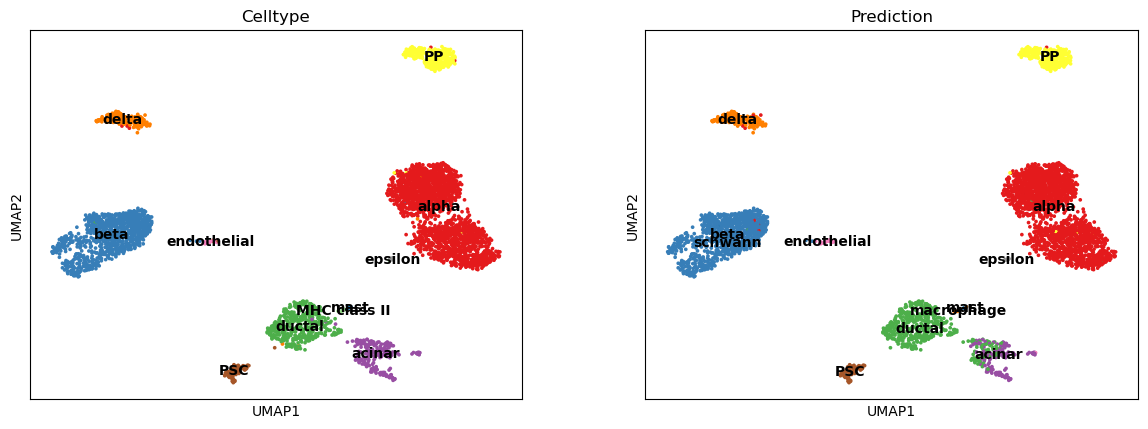

In [9]:
sc.pl.umap(new_adata, color=['Celltype', 'Prediction'],legend_loc='on data')